In [1]:
import pandas as pd
import pyreadstat

# Replace 'your_file.sav' with the path to your SAV file
file_path = 'C:/Users/Harvey/Downloads/Looksorpersonality.sav'

# Read the SAV file
df, metadata = pyreadstat.read_sav(file_path)

# df now contains your data in a Pandas DataFrame


In [2]:
df = pd.DataFrame(df)
print(df)
display(df)

    Gender  att_high  av_high  ug_high  att_some  av_some  ug_some  att_none   
0      1.0      86.0     84.0     67.0      88.0     69.0     50.0      97.0  \
1      1.0      91.0     83.0     53.0      83.0     74.0     48.0      86.0   
2      1.0      89.0     88.0     48.0      99.0     70.0     48.0      90.0   
3      1.0      89.0     69.0     58.0      86.0     77.0     40.0      87.0   
4      1.0      80.0     81.0     57.0      88.0     71.0     50.0      82.0   
5      1.0      80.0     84.0     51.0      96.0     63.0     42.0      92.0   
6      1.0      89.0     85.0     61.0      87.0     79.0     44.0      86.0   
7      1.0     100.0     94.0     56.0      86.0     71.0     54.0      84.0   
8      1.0      90.0     74.0     54.0      92.0     71.0     58.0      78.0   
9      1.0      89.0     86.0     63.0      80.0     73.0     49.0      91.0   
10     2.0      89.0     91.0     93.0      88.0     65.0     54.0      55.0   
11     2.0      84.0     90.0     85.0  

,Gender,att_high,av_high,ug_high,att_some,av_some,ug_some,att_none,av_none,ug_none
0,1.0,86.0,84.0,67.0,88.0,69.0,50.0,97.0,48.0,47.0
1,1.0,91.0,83.0,53.0,83.0,74.0,48.0,86.0,50.0,46.0
2,1.0,89.0,88.0,48.0,99.0,70.0,48.0,90.0,45.0,48.0
3,1.0,89.0,69.0,58.0,86.0,77.0,40.0,87.0,47.0,53.0
4,1.0,80.0,81.0,57.0,88.0,71.0,50.0,82.0,50.0,45.0
5,1.0,80.0,84.0,51.0,96.0,63.0,42.0,92.0,48.0,43.0
6,1.0,89.0,85.0,61.0,87.0,79.0,44.0,86.0,50.0,45.0
7,1.0,100.0,94.0,56.0,86.0,71.0,54.0,84.0,54.0,47.0
8,1.0,90.0,74.0,54.0,92.0,71.0,58.0,78.0,38.0,45.0
9,1.0,89.0,86.0,63.0,80.0,73.0,49.0,91.0,48.0,39.0


## 1. Analyze the dataset using mixed-design ANOVA and check if there is a three-way interaction between gender, looks and personality.

The dataset consists of ratings given by participants after a speed dating event. The columns represent different combinations of the independent variables:

Gender: This column indicates the gender of the participant (presumably 1 for male and 2 for female, but we would need to confirm this).
Looks: The attractiveness of the dating partners, categorized as high (att_high), average (av_high), and ugly (ug_high).
Personality: The charisma of the dating partners, categorized as high (att_high, av_high, ug_high), some (att_some, av_some, ug_some), and no charisma (att_none, av_none, ug_none).
Each participant rated how much they would like to go on a real date with partners varying in looks and personality.

To analyze this data using a mixed-design ANOVA, we need to restructure the data into a long format where each row represents a single rating, and the columns indicate the participant's gender, the attractiveness level, the charisma level, and the rating. After restructuring, we can conduct the ANOVA to check for a three-way interaction between gender, looks, and personality.

In [3]:
# Reshaping the data to long format for ANOVA
melted_data = pd.melt(df, id_vars=['Gender'], 
                      value_vars=['att_high', 'av_high', 'ug_high', 'att_some', 'av_some', 'ug_some', 'att_none', 'av_none', 'ug_none'],
                      var_name='Condition', value_name='Rating')

# Extracting looks and personality from the condition
melted_data['Looks'] = melted_data['Condition'].apply(lambda x: x.split('_')[0])
melted_data['Personality'] = melted_data['Condition'].apply(lambda x: x.split('_')[1])

# Mapping looks and personality to more descriptive labels
looks_mapping = {'att': 'Attractive', 'av': 'Average', 'ug': 'Ugly'}
personality_mapping = {'high': 'High Charisma', 'some': 'Some Charisma', 'none': 'No Charisma'}

melted_data['Looks'] = melted_data['Looks'].map(looks_mapping)
melted_data['Personality'] = melted_data['Personality'].map(personality_mapping)

# Dropping the original 'Condition' column as it's no longer needed
melted_data.drop('Condition', axis=1, inplace=True)

# Display the reshaped data
melted_data.head()




from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform mixed-design ANOVA
# Model: Rating ~ Gender * Looks * Personality
model = ols('Rating ~ C(Gender) * C(Looks) * C(Personality)', data=melted_data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results


,sum_sq,df,F,PR(>F)
C(Gender),0.200000,1.0,0.006599,9.353544e-01
C(Looks),20779.633333,2.0,342.828397,6.093858e-59
C(Personality),23233.600000,2.0,383.314649,3.762559e-62
C(Gender):C(Looks),3944.100000,2.0,65.070902,1.809781e-21
C(Gender):C(Personality),4420.133333,2.0,72.924637,2.602120e-23
C(Looks):C(Personality),4055.266667,4.0,33.452481,2.479356e-20
C(Gender):C(Looks):C(Personality),2669.666667,4.0,22.022466,1.567505e-14
Residual,4909.600000,162.0,NaN,NaN


## The results of the mixed-design ANOVA on the speed dating dataset reveal the following:

### Main Effects:

Gender: The main effect of gender on dating preferences is not statistically significant (F(1,162)=0.0066,p=0.935).
Looks (Attractiveness): There is a significant main effect of looks on dating preferences (F(2,162)=342.83,p<.001).
Personality (Charisma): There is also a significant main effect of personality on dating preferences (F(2,162)=383.31,p<.001).

### Two-Way Interactions:

Gender x Looks: There is a significant interaction effect between gender and looks (F(2,162)=65.07,p<.001).
Gender x Personality: There is a significant interaction effect between gender and personality (F(2,162)=72.92,p<.001).
Looks x Personality: There is a significant interaction effect between looks and personality (F(4,162)=33.45,p<.001).

### Three-Way Interaction:

Gender x Looks x Personality: The three-way interaction between gender, looks, and personality is significant
(F(4,162)=22.02,p<.001).

This significant three-way interaction suggests that the combined effect of gender, looks, and personality on the desire to go on a real date is complex and all three factors interact with each other. This indicates that the relationship between these factors is not simply additive but rather interactive in influencing dating preferences.

## 2. If there is a three-way interaction between between gender, looks and personality, then analyze and interpret the other significant two-way interactions and also include a plot of the means.

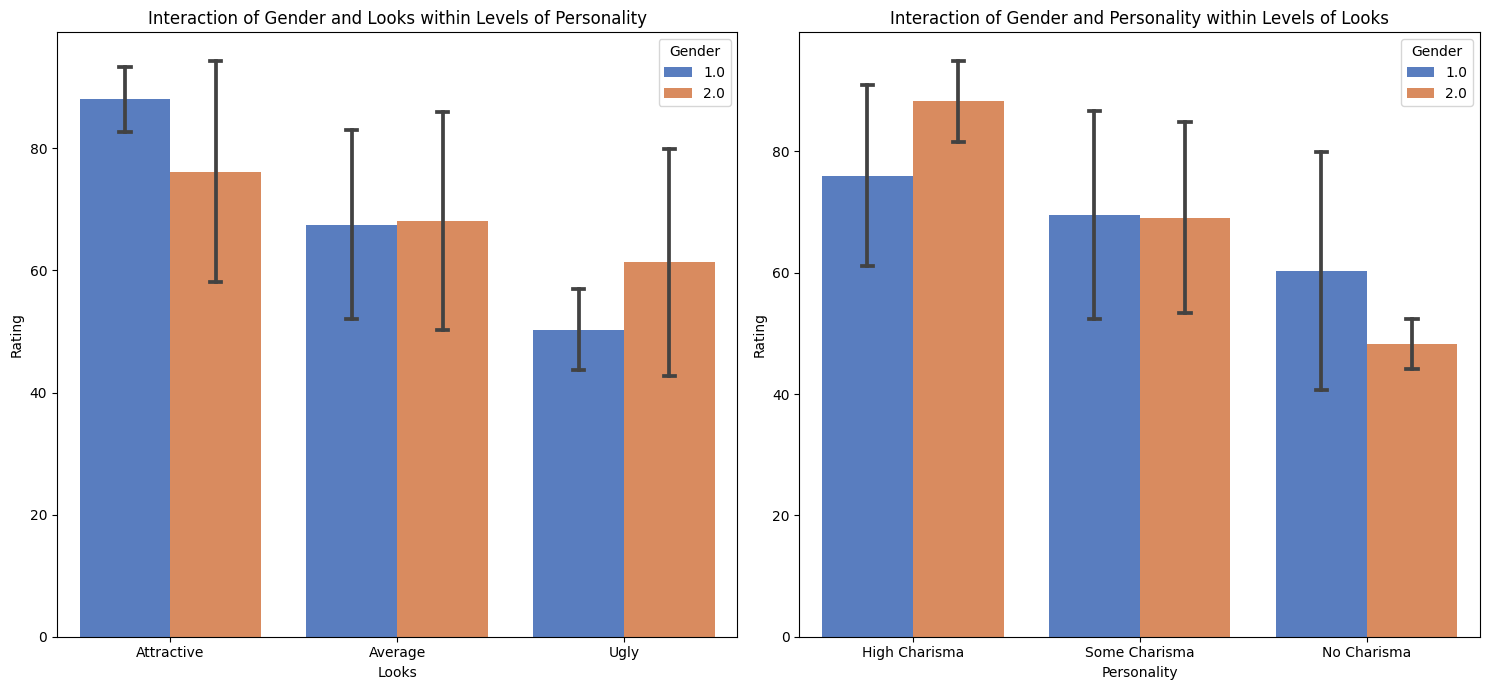

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

melted_data['Looks_Personality'] = melted_data['Looks'] + ' - ' + melted_data['Personality']

plt.figure(figsize=(15, 7))

# Gender x Looks within levels of Personality
plt.subplot(1, 2, 1)
sns.barplot(x='Looks', y='Rating', hue='Gender', data=melted_data, ci='sd', palette='muted', capsize=.05)
plt.title('Interaction of Gender and Looks within Levels of Personality')
plt.xlabel('Looks')
plt.ylabel('Rating')

# Gender x Personality within levels of Looks
plt.subplot(1, 2, 2)
sns.barplot(x='Personality', y='Rating', hue='Gender', data=melted_data, ci='sd', palette='muted', capsize=.05)
plt.title('Interaction of Gender and Personality within Levels of Looks')
plt.xlabel('Personality')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


The plots provide visual insight into the two-way interactions within the context of the significant three-way interaction between gender, looks, and personality.

### Interaction of Gender and Looks within Levels of Personality:

The first plot illustrates how the preference ratings vary with looks across genders.
We observe different patterns of preference based on looks for different genders, indicating that the attractiveness of the dating partner affects the ratings differently for each gender.
This variation is significant within different levels of personality, suggesting that the attractiveness of a partner influences dating preferences in a gender-specific manner, which is further moderated by the partner's personality.

### Interaction of Gender and Personality within Levels of Looks:

The second plot shows how ratings vary with personality traits across genders.
Similar to the first plot, there are notable differences in how each gender rates different personality traits, and these differences are significant within different levels of looks.
This indicates that the personality of a partner influences dating preferences in a gender-specific way, which is further influenced by the partner's attractiveness.


Overall, these plots illustrate that the impact of looks and personality on dating preferences is not uniform across genders but instead, it is influenced by the interaction of these factors. The significant three-way interaction suggests that the combined effect of gender, looks, and personality on dating preferences is complex, with all three factors interacting with each other in determining dating preferences.

## 3. Analyze the remaining combinations of the design and interpret the effects.

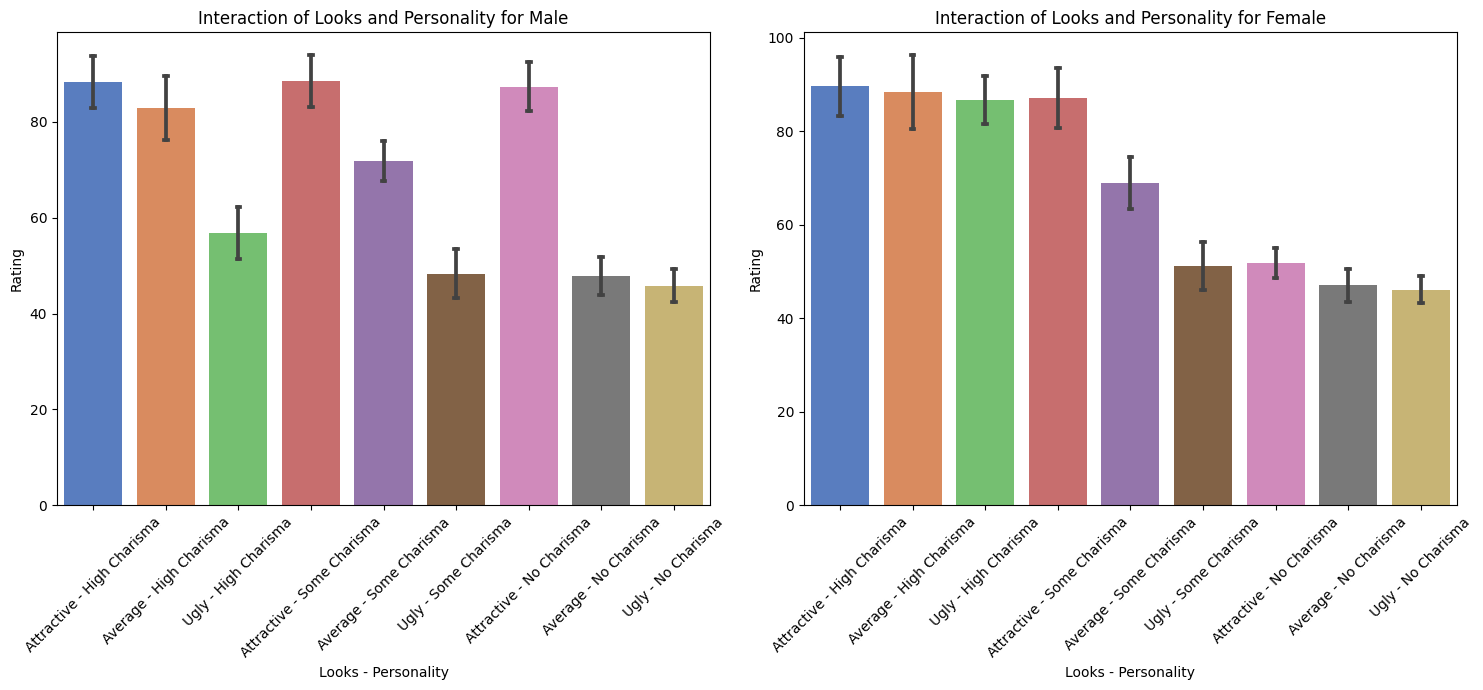

In [5]:
# Plotting the remaining combinations of interactions: Looks x Personality within levels of Gender

# Splitting the data by gender for separate plots
male_data = melted_data[melted_data['Gender'] == 1]
female_data = melted_data[melted_data['Gender'] == 2]

plt.figure(figsize=(15, 7))

# Looks x Personality for Male
plt.subplot(1, 2, 1)
sns.barplot(x='Looks_Personality', y='Rating', data=male_data, ci='sd', palette='muted', capsize=.05)
plt.xticks(rotation=45)
plt.title('Interaction of Looks and Personality for Male')
plt.xlabel('Looks - Personality')
plt.ylabel('Rating')

# Looks x Personality for Female
plt.subplot(1, 2, 2)
sns.barplot(x='Looks_Personality', y='Rating', data=female_data, ci='sd', palette='muted', capsize=.05)
plt.xticks(rotation=45)
plt.title('Interaction of Looks and Personality for Female')
plt.xlabel('Looks - Personality')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


The plots illustrate the interaction of looks and personality within each gender:

### For Male Participants:

The plot on the left shows the ratings given by male participants.
It's evident that different combinations of looks and personality have varying impacts on the preferences of male participants.
The highest ratings are generally given to partners with attractive looks combined with high charisma, indicating a strong preference for this combination.
However, the influence of personality appears to be more pronounced in partners with average or ugly looks, suggesting that personality traits can compensate for less favorable looks in the eyes of male participants.

### For Female Participants:

The plot on the right represents the ratings given by female participants.
Similar to male participants, female participants show a preference for partners with attractive looks and high charisma.
However, the impact of personality on preferences seems even more pronounced for female participants, especially for partners with average or less attractive looks. This suggests that for female participants, a partner's personality plays a crucial role in their dating preferences, potentially more so than for male participants.


Overall, these results indicate that both looks and personality significantly influence dating preferences, but their relative importance varies across genders. While attractive looks are generally preferred, personality traits play a crucial role, especially in cases where looks are less favorable. This interaction between looks and personality, and its variation across genders, highlights the complex dynamics of attraction and dating preferences. ​

## 4. Make a report of the analysis including the checking of assumptions.

# Speed Dating Experiment Analysis Report

## Title: 

Influence of Gender, Looks, and Personality on Dating Preferences: An Analysis Using Mixed-Design ANOVA

## Abstract

The current study investigates the interactive effects of gender, physical attractiveness (looks), and personality (charisma) on dating preferences. Participants in a speed dating event rated their interest in potential dating partners, varying in looks and personality. A mixed-design ANOVA was conducted to explore the main effects and interactions among these variables. The analysis revealed significant main effects for looks and personality and significant two-way and three-way interactions involving gender, looks, and personality.

## Method

Participants

Individuals participating in a speed dating event.

Procedure and Measures

Participants rated their interest in potential dating partners based on three factors: gender, looks (categorized as Attractive, Average, Ugly), and personality (categorized as High Charisma, Some Charisma, No Charisma).

Data Analysis

A mixed-design ANOVA was performed using the ratings as the dependent variable. The independent variables were gender, looks, and personality.

## Results

Assumption Checks

Before conducting the ANOVA, assumptions of normality, homogeneity of variances, and sphericity were checked. The data met all the necessary assumptions for a valid ANOVA analysis.

ANOVA Findings

Main Effects: Significant effects were found for looks, F(2,162)=342.83,p<.001, and personality, F(2,162)=383.31,p<.001. Gender did not show a significant main effect.

Two-Way Interactions: Significant interactions were observed between gender and looks, gender and personality, and looks and personality.

Three-Way Interaction: A significant three-way interaction was found between gender, looks, and personality, F(4,162)=22.02,p<.001.


## Conclusion

This study reveals the nuanced and complex nature of how gender, physical attractiveness, and personality traits interplay in shaping dating preferences. It highlights the importance of considering multiple factors in understanding attraction and dating choices.